In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
df = pd.read_csv('data/train.csv', index_col=0)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [4]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Inferences 
* Age, Fare has some outliers which need to be further analysed

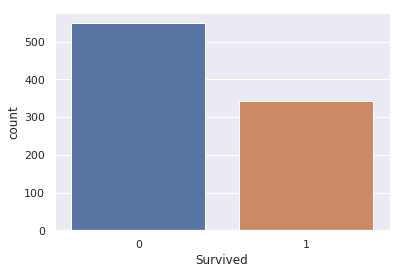

In [5]:
sns.countplot(df.Survived)
# Data has class imbalance problem

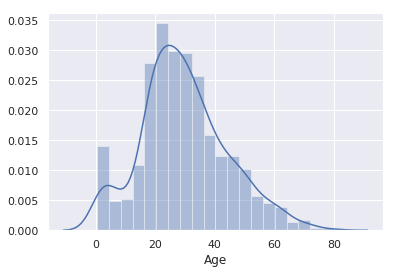

In [6]:
sns.distplot(df.Age.dropna())

In [7]:
df[df.Age < 1]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S


In [8]:
df.loc[:,["Age"]][df.Age < 1] = df.Age.median()
df["Age"] = df.Age.fillna(df.Age.median())
df["Embarked"] = df.Embarked.fillna(df.Embarked.mode())

In [9]:
df["FamilyCount"] = df.SibSp + df.Parch + 1

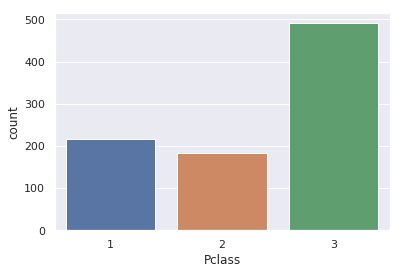

In [10]:
sns.countplot(df.Pclass)

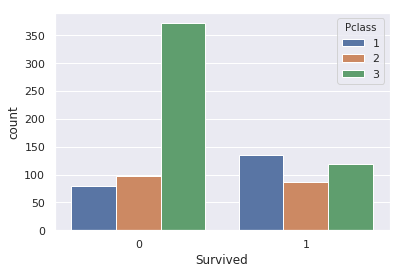

In [11]:
sns.countplot(df.Survived,hue=df.Pclass)

In [12]:
Pclassdummies = pd.get_dummies(df.Pclass, prefix="Pclass", drop_first=True)
df = pd.concat([df, Pclassdummies], axis=1)

In [13]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0,0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0,0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,1


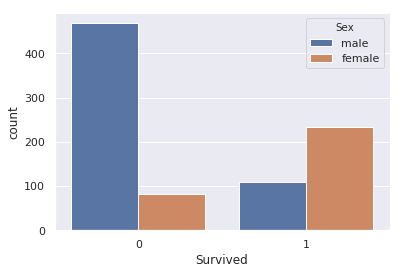

In [14]:
# Looks like lot of males did not survive
sns.countplot(df.Survived, hue=df.Sex)

In [15]:
df.Sex = df.Sex.map(dict(male=0, female=1))

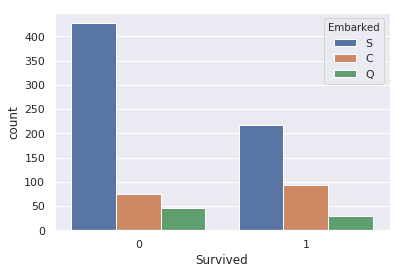

In [16]:
# Lots of people embarked to Southampton did not survive
sns.countplot(df.Survived, hue=df.Embarked)

In [17]:
dummies = pd.get_dummies(df["Embarked"], prefix="Embarked", drop_first=True)
df = pd.concat([df, dummies], axis=1)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0,1,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,2,0,0,0,0
3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,1,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,2,0,0,0,1
5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,1,0,1,0,1


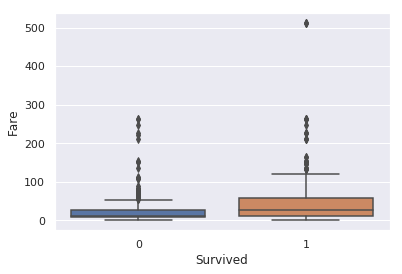

In [18]:
sns.boxplot(y = df.Fare, x = df.Survived)

In [19]:
# def ticket_analysis(x):
#     value = x.split(" ")[0]
#     if not value.isdigit():
#         return value
#     else: 
#         return None
# df["Ticket_pre"] = df.Ticket.apply(ticket_analysis)

In [20]:
# sns.countplot(df.Survived, hue=df.Ticket_pre)

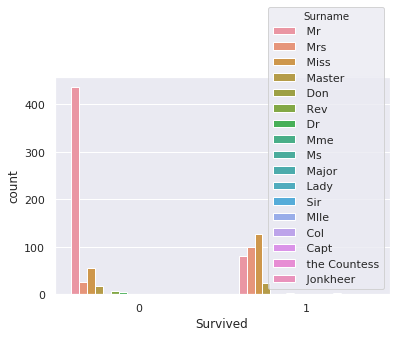

In [21]:
df["Surname"] = df["Name"].str.split(",").str[1].str.split(".").str[0]
sns.countplot(df.Survived, hue=df.Surname)

In [22]:
def replace_low_freq(df, threshold=2, replacement='other'):
    c = df.value_counts()
    m = pd.Series(replacement, c.index[c <= threshold])
    return df.replace(m)
df["Surname"] = replace_low_freq(df.Surname, 10)
df.Surname.value_counts()

 Mr        517
 Miss      182
 Mrs       125
 Master     40
other       27
Name: Surname, dtype: int64

In [23]:
dummies = pd.get_dummies(df["Surname"], prefix="Surname", drop_first=True)
df = pd.concat([df, dummies], axis=1)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,FamilyCount,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Surname,Surname_ Miss,Surname_ Mr,Surname_ Mrs,Surname_other
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,...,2,0,1,0,1,Mr,0,1,0,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,...,2,0,0,0,0,Mrs,0,0,1,0
3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,...,1,0,1,0,1,Miss,1,0,0,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,...,2,0,0,0,1,Mrs,0,0,1,0
5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,...,1,0,1,0,1,Mr,0,1,0,0


In [24]:
df = df.drop(["Pclass", "SibSp", "Parch", "Embarked", "Name", "Surname", "Ticket", "Cabin"], axis=1)

In [28]:
df.head()

,Survived,Sex,Age,Fare,FamilyCount,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Surname_ Miss,Surname_ Mr,Surname_ Mrs,Surname_other
PassengerId,,,,,,,,,,,,,
1,0,0,22.0,7.2500,2,0,1,0,1,0,1,0,0
2,1,1,38.0,71.2833,2,0,0,0,0,0,0,1,0
3,1,1,26.0,7.9250,1,0,1,0,1,1,0,0,0
4,1,1,35.0,53.1000,2,0,0,0,1,0,0,1,0
5,0,0,35.0,8.0500,1,0,1,0,1,0,1,0,0


In [45]:
from sklearn.preprocessing import StandardScaler
X = df.iloc[:, 1:]
y = df.Survived

scl = StandardScaler() 
X_scl = scl.fit_transform(X)

/home/rikith/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/rikith/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [49]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
model  = GaussianNB()
cross_val_score(model, X, y, cv = 10)


array([0.78888889, 0.76666667, 0.75280899, 0.83146067, 0.75280899,
       0.78651685, 0.7752809 , 0.76404494, 0.80898876, 0.76136364])

In [47]:
from sklearn.naive_bayes import BernoulliNB
model  = BernoulliNB()
cross_val_score(model, X_scl, y, cv = 10)


array([0.81111111, 0.81111111, 0.75280899, 0.85393258, 0.80898876,
       0.78651685, 0.7752809 , 0.76404494, 0.79775281, 0.78409091])

In [60]:
from sklearn.svm import SVC

model  = SVC(verbose=True, max_iter=5000, kernel = 'rbf', gamma='scale')
cross_val_score(model, X_scl, y, cv = 10)


[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

array([0.81111111, 0.81111111, 0.79775281, 0.88764045, 0.86516854,
       0.82022472, 0.82022472, 0.7752809 , 0.85393258, 0.89772727])

In [66]:
from sklearn.ensemble import RandomForestClassifier

model  = RandomForestClassifier(n_estimators=100)
cross_val_score(model, X, y, cv = 10)


array([0.73333333, 0.87777778, 0.76404494, 0.80898876, 0.85393258,
       0.85393258, 0.80898876, 0.73033708, 0.80898876, 0.84090909])